# Entropy

## Entropy Chain Rule

$$ H(X_1, X_2, \ldots, X_n) = \sum H(X_i\ \vert\ X_1, \ldots, X_{i-1}) $$

We show this proposition $P(n)$ by induction. Consider the base case:
$$ H(X_1) = \sum H(X_1) $$
For the inductive step, we show $P(n+1)$ given $P(1) \ldots P(n)$. By definition of joint entropy:
$$ H(X\ \vert\ Y) = H(X, Y) - H(Y) $$
$$ \therefore H(X, Y) = H(X\ \vert\ Y) + H(Y) $$
So we have:
$$ H(X_1, \ldots, X_n, X_{n+1}) = H(X_{n+1}\ \vert\ X_1, \ldots, X_n) + H(X_1, \ldots, X_n) $$
But by induction:
$$ H(X_1, \ldots, X_n) = \sum_i^n H(X_i\ \vert\ X_1, \ldots, X_{i-1}) $$
So we have:
$$ H(X_1, \ldots, X_n, X_{n+1}) = H(X_{n+1}\ \vert\ X_1, \ldots, X_n) + \sum_i^n H(X_i\ \vert\ X_1, \ldots, X_{i-1}) = \sum_i^{n+1} H(X_i\ \vert\ X_1, \ldots, X_{i-1}) $$
Hence the inductive step.

## Relative Entropy

First, we draw $n$ samples from $\mathcal{N}(0., 1.)$. The we compute the transformation $Y = X^2$.

KL divergence: 0.26672763770732644


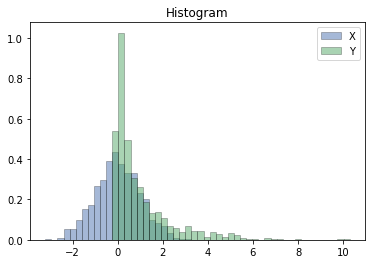

In [5]:
%matplotlib inline

from matplotlib import pyplot as plt
from numpy import abs, histogram
from numpy.random import normal
from scipy.stats import entropy

# Sample
N = 1000
X_samples = normal(size=N)

# Transform
Y_samples = X_samples ** 2

# Compute the histograms
BINS = 50
RANGE = (0., max(abs(X_samples).max(), Y_samples.max()))

X_histogram, _ = histogram(abs(X_samples), bins=BINS, range=RANGE)
Y_histogram, _ = histogram(Y_samples, bins=BINS, range=RANGE)

# Smooth and normalize
EPS = 1e-8
X_histogram, Y_histogram = X_histogram + EPS, Y_histogram + EPS
X_histogram, Y_histogram = X_histogram / X_histogram.sum(), Y_histogram / Y_histogram.sum()

# Compute KL divergence
kl_divergence = entropy(X_histogram, Y_histogram)
print(f"KL divergence: {kl_divergence}")

# Draw the histograms
RANGE = (X_samples.min(), max(X_samples.max(), Y_samples.max()))
plt.style.use("seaborn-deep")
plt.hist(X_samples, bins=BINS, range=RANGE, alpha=0.5, label="X", density=True, edgecolor="black", linewidth=.5)
plt.hist(Y_samples, bins=BINS, range=RANGE, alpha=0.5, label="Y", density=True, edgecolor="black", linewidth=.5)
plt.title("Histogram")
plt.legend(loc="upper right")
plt.show()

Changing the number of bins changes the KL-divergence noticeably.

## Analytic Solution
Given the transformed random variable $Y = X^2$ where $X \sim \mathcal{N}(0., 1.)$, we must first compute the density of $Y$. We cannot use the cumulative density approach because the Gaussian does not have a closed form integral. Instead, we use the differentiation trick:
$$ p(x) = \frac{1}{\sqrt{2 \pi}} \exp \left( -\frac{x^2}{2} \right) $$
$$ Y = r(X) = X^2 $$
$$ r^{-1}(y) = \sqrt{y} $$
$$ f(y) = p(r^{-1}(y)) \vert \frac{dr^{-1}}{dy} \vert $$
$$ f(y) = \frac{1}{\sqrt{8 \pi y}} \exp \left( -\frac{y}{2} \right) $$

Hence we compute the KL-divergence:
$$ D_{KL}(X, Y) = \int \frac{1}{\sqrt{2 \pi}} \exp \left( -\frac{x^2}{2} \right) \ln \frac{\frac{1}{\sqrt{2 \pi}} \exp \left( -\frac{x^2}{2} \right)}{\frac{1}{\sqrt{8 \pi x}} \exp \left( -\frac{x}{2} \right)} dx $$
$$ = \int \frac{1}{\sqrt{2 \pi}} \exp \left( -\frac{x^2}{2} \right) \ln \frac{1}{\sqrt{2 \pi}} \exp \left( -\frac{x^2}{2} \right) dx - \int \frac{1}{\sqrt{2 \pi}} \exp \left( -\frac{x^2}{2} \right) \ln \frac{1}{\sqrt{8 \pi x}} \exp \left( -\frac{x}{2} \right) dx $$
$$ = \frac{1}{2} \ln (2 \pi e) $$

The second term, cross-entropy of Y from X, is not integrable:

In [4]:
from IPython.display import IFrame

IFrame(f"https://www.desmos.com/calculator/w1bldgzrrq", width=1280, height=600)